# Statistical Hypothesis Tests in Python

[blog link](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

# Imports

In [7]:
import numpy as np
import pandas as pd
import pylab as plt

import data_science_tools as tools
import src

# Analysis

## Normality Tests

### Shapiro-Wilk Test

Tests whether a data sample has a gaussian distribution.

Assumptions

* Observation in each sample are independent and identically distributed (iid)

Interpretation

* H0: the sample has a Gaussian distribution
* H1: the sample does not have Guassian distribution

In [2]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.895, p=0.193
Probably Gaussian


In [33]:
from scipy.stats import uniform, norm
distribution = uniform(scale=5)
data = distribution.rvs(100)
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))


stat=0.965, p=0.009


In [34]:
from scipy.stats import uniform, norm
distribution = norm(scale=5)
data = distribution.rvs(100)
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))


stat=0.992, p=0.809


### D'Agostino's K^2 Test

Tests whether data sample has gaussian distribution

Assumptions

* Observations in sample are independent and identically distributed



stat=1.999, p=0.368
Probably Gaussian


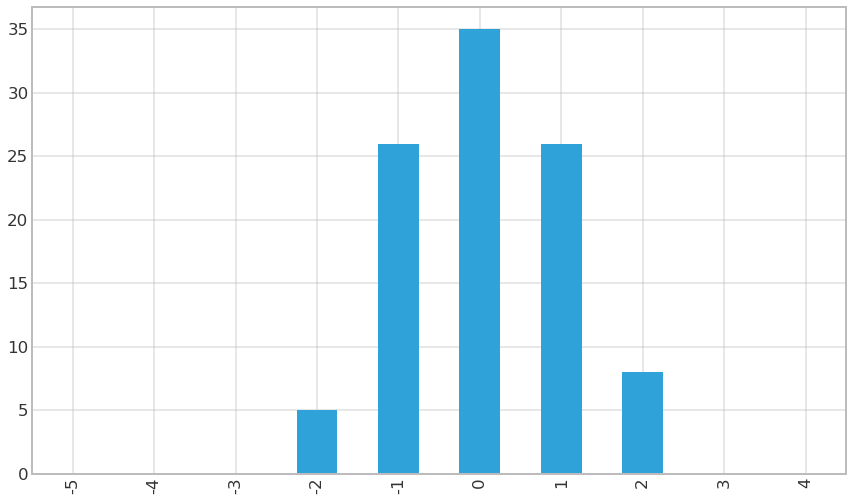

In [83]:
from scipy.stats import normaltest, uniform, norm
data = norm().rvs(100)
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
tools.quantize_hist(data, np.arange(-5, 5)).plot.bar()
plt.show()

### Anderson-Darling Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

* Observations in each sample are independent and identically distributed (iid).

Interpretation

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.


stat=0.194
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


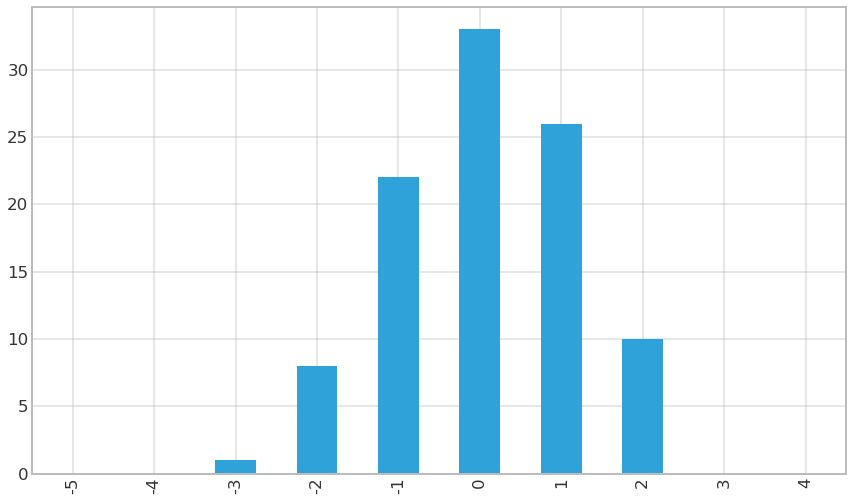

In [117]:
from scipy.stats import anderson, norm, uniform

data = norm().rvs(100)
# data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))
        
tools.quantize_hist(data, np.arange(-5, 5)).plot.bar()
plt.show()

## Correlation Tests

### Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.


In [118]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


stat=0.018, p=0.858
Probably independent


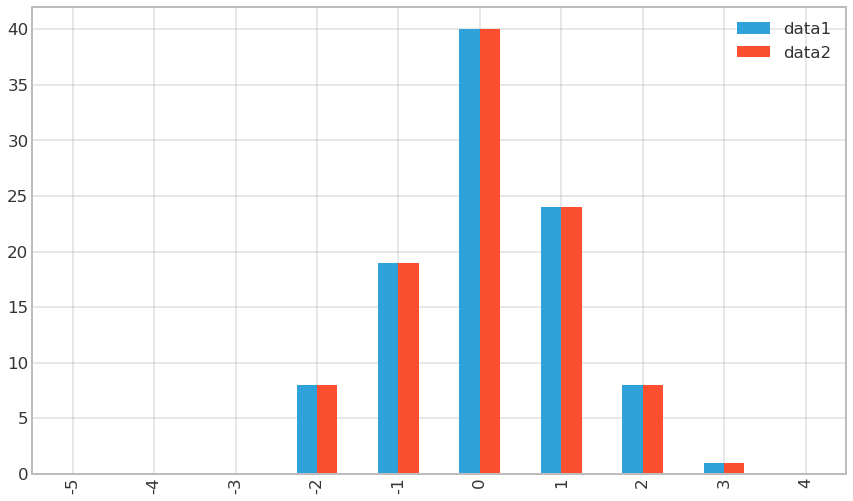

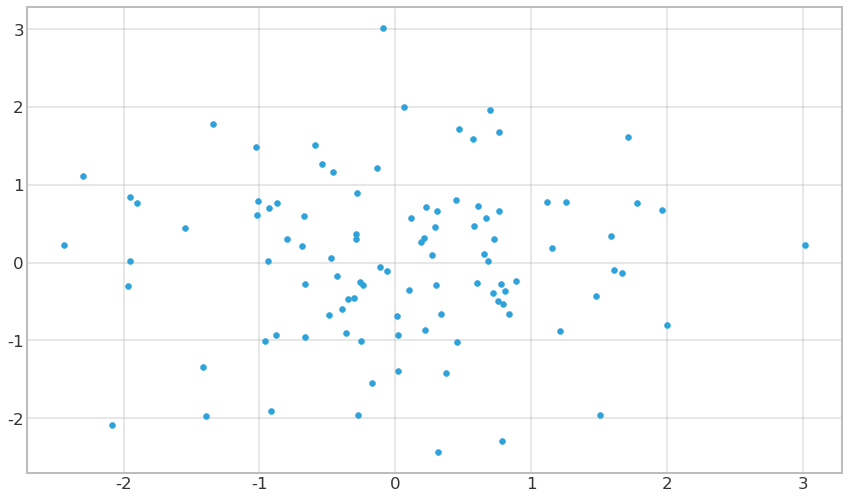

In [145]:
from scipy.stats import pearsonr, norm, uniform

size = 100
data1 = norm().rvs(size)
data2 = data1.copy() 
np.random.shuffle(data2)
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


pd.DataFrame({
    'data1': tools.quantize_hist(data1, np.arange(-5, 5)),
    'data2': tools.quantize_hist(data2, np.arange(-5, 5)),
}).plot.bar()
plt.figure()
plt.scatter(data1, data2)

plt.show()

### Spearman's Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.


In [147]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


stat=1.000, p=0.000
Probably dependent


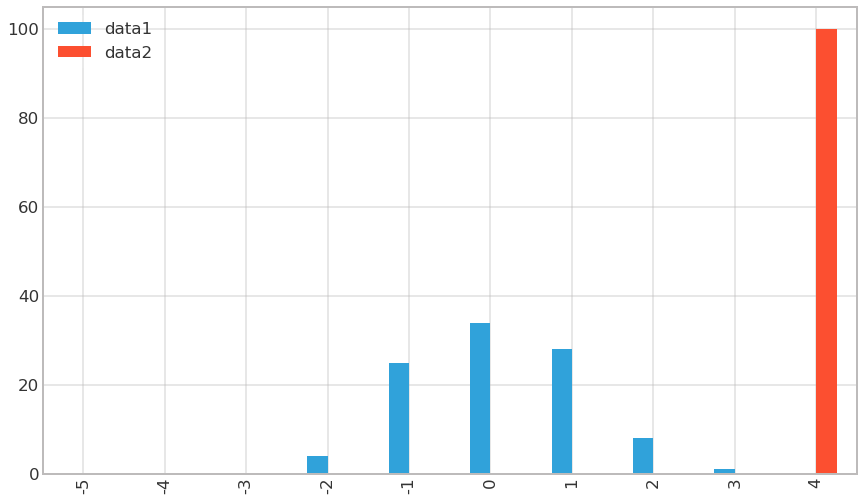

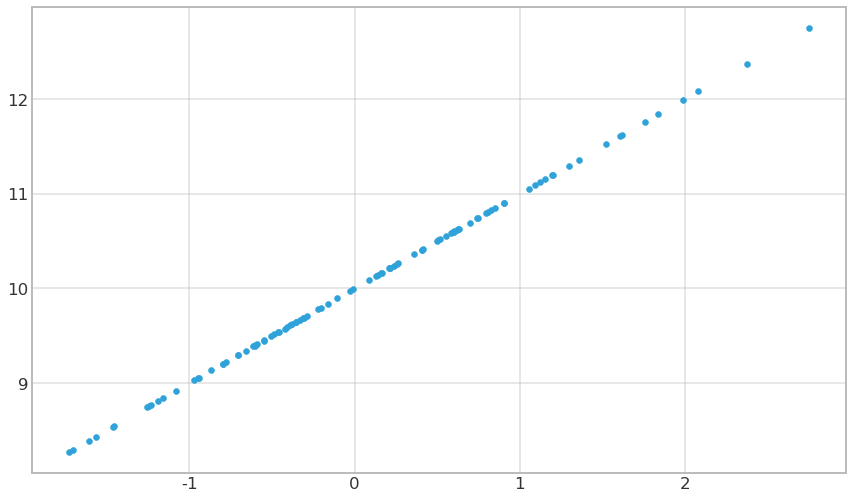

In [149]:
from scipy.stats import spearmanr, norm, uniform

size = 100
data1 = norm().rvs(size)
data2 = data1.copy() + 10
#np.random.shuffle(data2)
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


pd.DataFrame({
    'data1': tools.quantize_hist(data1, np.arange(-5, 5)),
    'data2': tools.quantize_hist(data2, np.arange(-5, 5)),
}).plot.bar()
plt.figure()
plt.scatter(data1, data2)

plt.show()

### Kendall's Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.


In [150]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


stat=0.023, p=0.739
Probably independent


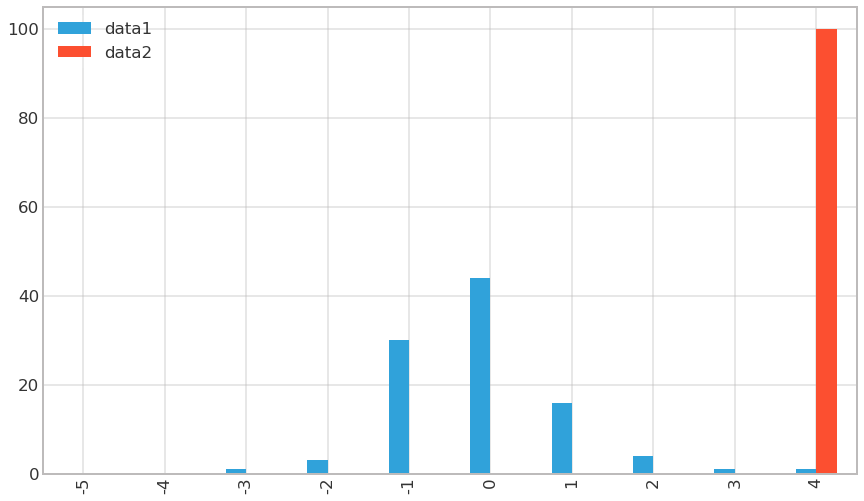

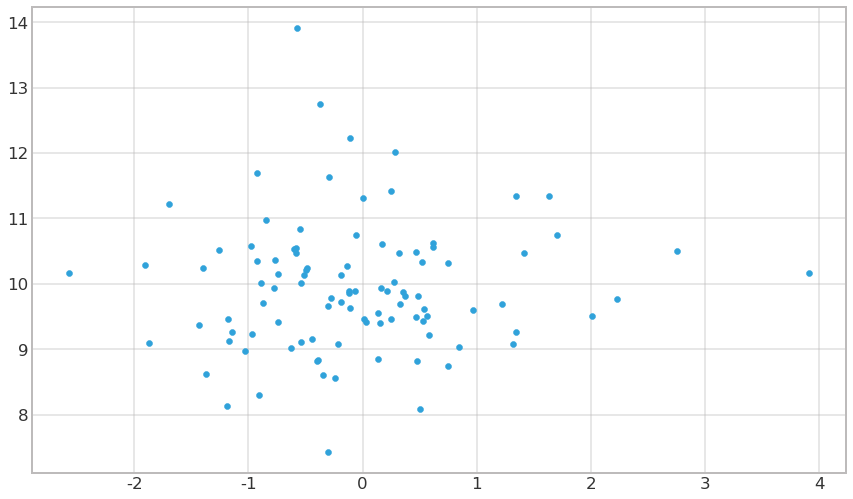

In [152]:
from scipy.stats import kendalltau, norm, uniform

size = 100
data1 = norm().rvs(size)
data2 = data1.copy() + 10
np.random.shuffle(data2)
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


pd.DataFrame({
    'data1': tools.quantize_hist(data1, np.arange(-5, 5)),
    'data2': tools.quantize_hist(data2, np.arange(-5, 5)),
}).plot.bar()
plt.figure()
plt.scatter(data1, data2)

plt.show()

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

* Observations used in the calculation of the contingency table are independent.
* 25 or more examples in each cell of the contingency table.

Interpretation

* H0: the two samples are independent.
* H1: there is a dependency between the samples.


In [153]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


In [169]:
from scipy.stats import chi2_contingency, norm, uniform

size = 100
data1 = np.abs(norm(loc=10).rvs(size))
data2 = data1.copy()
#np.random.shuffle(data2)
table = [data1, data2]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.000, p=1.000
Probably independent


In [170]:

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [
    [10, 20, 30],
    [6,  9,  17]
]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


## Stationary Tests

Statistical tests taht you can use to check if a time series is stationary or not

### Augmented Dickey-Fuller Unit Root Test

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions

* Observations in are temporally ordered.

Interpretation

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).


In [172]:

from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=2.430, p=0.999
Probably not Stationary


In [173]:
from statsmodels.tsa.stattools import adfuller
data = np.random.random(100)
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=-11.909, p=0.000
Probably Stationary


### Kwiatkowski-Phillips-Schmidt-Shin

Tests whether a time series is trend stationary or not.

Assumptions

* Observations in are temporally ordered.

Interpretation

* H0: the time series is not trend-stationary.
* H1: the time series is trend-stationary.


In [178]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


In [192]:
from statsmodels.tsa.stattools import kpss
data = np.random.random(100)
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.328, p=0.100
Probably not Stationary


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Parametric Statistical Hypothesis Tests

Compare data samples.

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.


In [194]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


stat=-0.787, p=0.432
Probably the same distribution


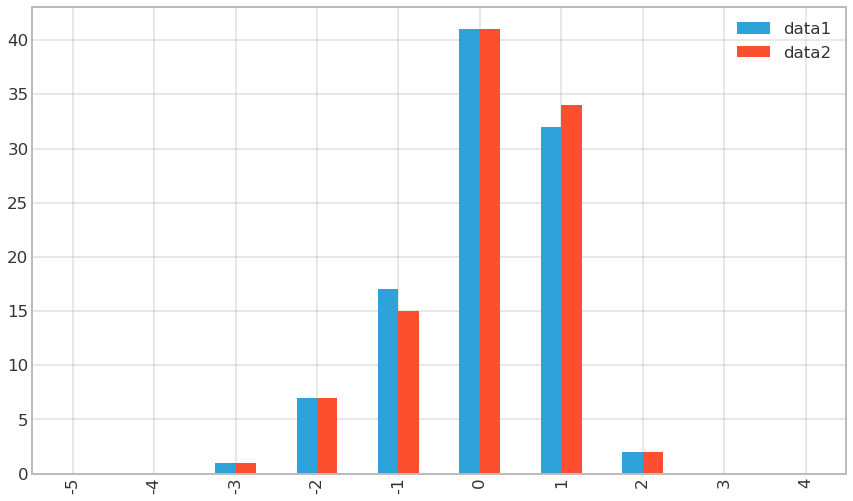

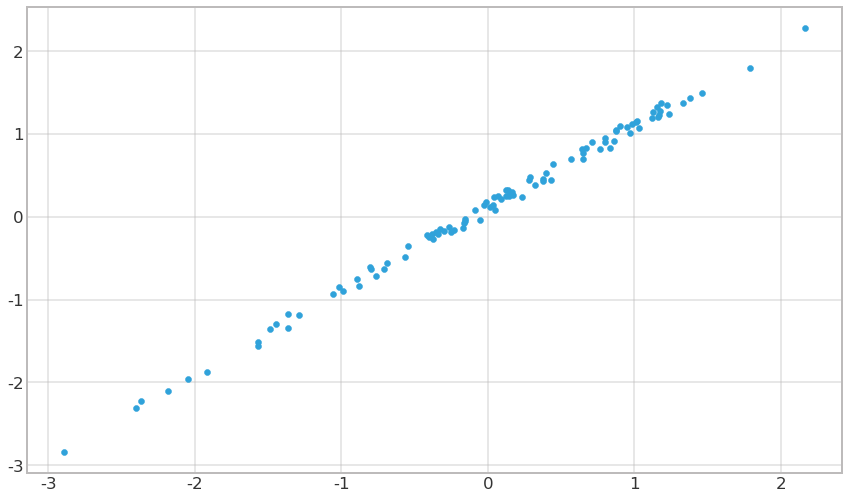

In [202]:
from scipy.stats import ttest_ind, norm, uniform
size = 100
data1 = norm().rvs(size)
data2 = data1 + np.random.random(size) * 0.2
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
pd.DataFrame({
    'data1': tools.quantize_hist(data1, np.arange(-5, 5)),
    'data2': tools.quantize_hist(data2, np.arange(-5, 5)),
}).plot.bar()
plt.figure()
plt.scatter(data1, data2)

plt.show()

### Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.


In [203]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


stat=-52.183, p=0.000
Probably different distributions


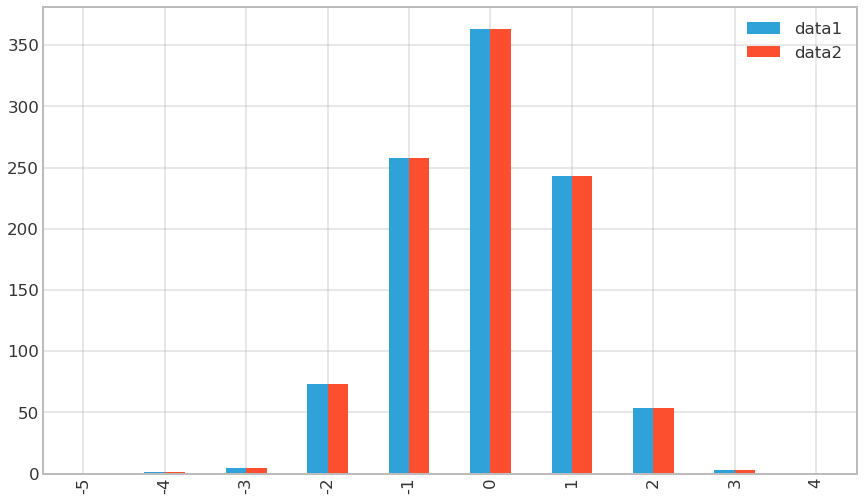

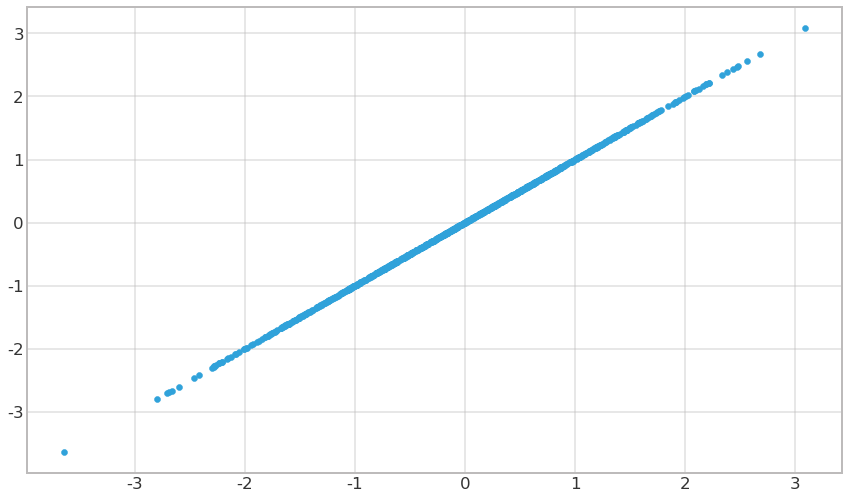

In [214]:
from scipy.stats import ttest_rel, norm, uniform
size = 1000
data1 = (norm().rvs(size))
data2 = (data1 + np.random.random(size) * 0.001)
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
pd.DataFrame({
    'data1': tools.quantize_hist(data1, np.arange(-5, 5)),
    'data2': tools.quantize_hist(data2, np.arange(-5, 5)),
}).plot.bar()
plt.figure()
plt.scatter(data1, data2)

plt.show()

### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.




In [208]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [226]:
from scipy.stats import f_oneway, norm

size = 1000
data1 = (norm().rvs(size))
data2 = data1.copy() + np.random.random(size) * 0.1
data3 = norm(loc=0, scale=100).rvs(size)

stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.881, p=0.415
Probably the same distribution


## Nonparametric Statistical Hypothesis Tests

Tests whether the distributions of two independent samples are equal or not.


### Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.


In [227]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


In [232]:
from scipy.stats import mannwhitneyu, norm
size = 1000
data1 = norm().rvs(size)
data2 = data1.copy() + np.random.random(size) * 0.1
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=485239.000, p=0.127
Probably the same distribution


### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.


In [233]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.508
Probably the same distribution


In [234]:
from scipy.stats import wilcoxon, norm

size = 1000
data1 = norm().rvs(size)
data2 = data1.copy() + np.random.random(size) * 0.1

stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


### Kruskal-Wallis H Test

Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.


In [235]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


In [244]:
from scipy.stats import kruskal, norm

size = 1000
data1 = norm().rvs(size)
data2 = data1.copy() + np.random.random(size) * 0.1

stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.265, p=0.261
Probably the same distribution


### Friedman Test

Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation

* H0: the distributions of all samples are equal.
* H1: the distributions of one or more samples are not equal.


In [245]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
